pip install tensorflow-addons

pip install tensorflow-datasets

In [10]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import tensorflow_addons as tfa

C:\Users\massa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
C:\Users\massa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of Tens

In [4]:
dataset, metadata = tfds.load('horses_or_humans', as_supervised=True, with_info=True, shuffle_files=True)
train_data, test_data = dataset['train'], dataset['test']

In [5]:
def preprocess(image, label):
    image = tf.image.resize(image, (150, 150))  # Resize images to 150x150
    image = image / 255.0  # Normalize pixel values
    return image, label

In [6]:
train_data = train_data.map(preprocess).cache().shuffle(1000).batch(32)
test_data = test_data.map(preprocess).batch(32)

In [7]:
train_size = metadata.splits['train'].num_examples
test_size = metadata.splits['test'].num_examples
print(f"Number of training images: {train_size}")
print(f"Number of testing images: {test_size}")

Number of training images: 1027
Number of testing images: 256


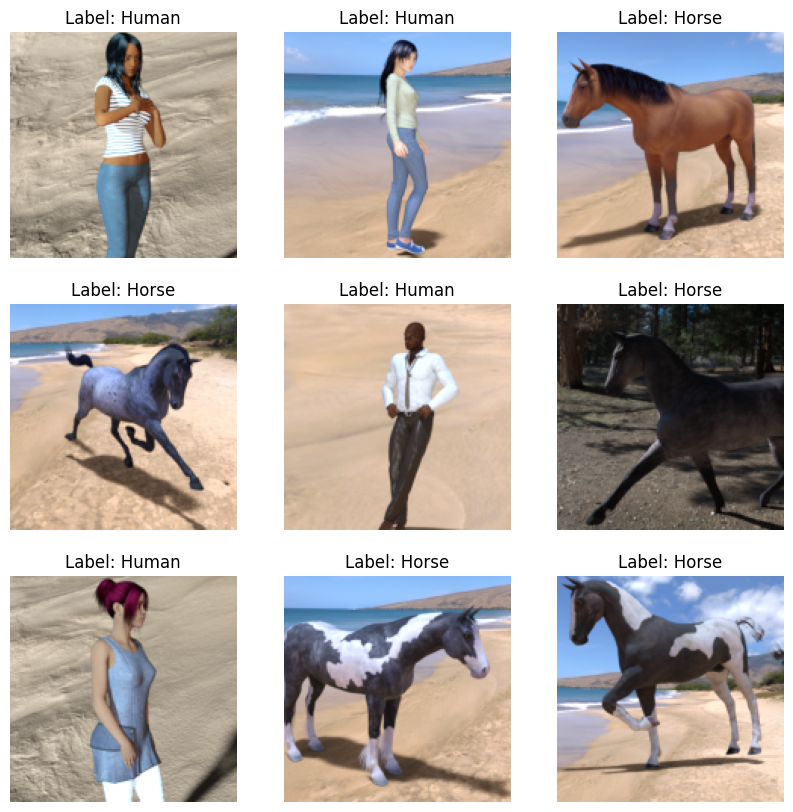

In [8]:
def plot_images(dataset):
    plt.figure(figsize=(10, 10))
    for i, (image, label) in enumerate(dataset.take(9)):
        plt.subplot(3, 3, i + 1)
        plt.imshow(image.numpy())
        plt.title(f"Label: {'Horse' if label.numpy() == 0 else 'Human'}")
        plt.axis("off")
    plt.show()

plot_images(train_data.unbatch())

In [11]:
augmented_train_data = train_data.map(lambda x, y: (tf.image.random_flip_left_right(x), y))
augmented_train_data = augmented_train_data.map(
    lambda x, y: (tfa.image.rotate(x, tf.random.uniform((), -0.2, 0.2)), y)
)

In [12]:
def build_cnn():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [13]:
model = build_cnn()
history = model.fit(train_data, validation_data=test_data, epochs=10)

Epoch 1/10



33/33 [==============================] - 12s 304ms/step - loss: 0.4796 - accuracy: 0.7799 - val_loss: 1.1526 - val_accuracy: 0.8047
Epoch 2/10
33/33 [==============================] - 41s 1s/step - loss: 0.1131 - accuracy: 0.9572 - val_loss: 1.9569 - val_accuracy: 0.7070
Epoch 3/10
33/33 [==============================] - 25s 706ms/step - loss: 0.0860 - accuracy: 0.9747 - val_loss: 1.5973 - val_accuracy: 0.7656
Epoch 4/10
33/33 [==============================] - 20s 615ms/step - loss: 0.0476 - accuracy: 0.9854 - val_loss: 1.4558 - val_accuracy: 0.8750
Epoch 5/10
33/33 [==============================] - 22s 661ms/step - loss: 0.0175 - accuracy: 0.9961 - val_loss: 2.2025 - val_accuracy: 0.7812
Epoch 6/10
33/33 [==============================] - 13s 402ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 2.7429 - val_accuracy: 0.7617
Epoch 7/10
33/33 [==============================] - 14s 424ms/step - loss: 4.4485e-04 - accuracy: 1.0000 - val_loss: 2.5619 - val_accuracy: 0.8008
Epoch 8/1

In [14]:
train_accuracy = history.history['accuracy'][-1]
test_accuracy = history.history['val_accuracy'][-1]
print(f"Training accuracy before augmentation: {train_accuracy}")
print(f"Testing accuracy before augmentation: {test_accuracy}")

Training accuracy before augmentation: 1.0
Testing accuracy before augmentation: 0.796875


In [15]:
augmented_model = build_cnn()
augmented_history = augmented_model.fit(augmented_train_data, validation_data=test_data, epochs=10)

Epoch 1/10
33/33 [==============================] - 11s 293ms/step - loss: 0.5297 - accuracy: 0.8101 - val_loss: 1.5511 - val_accuracy: 0.8008
Epoch 2/10
33/33 [==============================] - 21s 628ms/step - loss: 0.1071 - accuracy: 0.9620 - val_loss: 1.2522 - val_accuracy: 0.8281
Epoch 3/10
33/33 [==============================] - 15s 454ms/step - loss: 0.0971 - accuracy: 0.9562 - val_loss: 1.2535 - val_accuracy: 0.8125
Epoch 4/10
33/33 [==============================] - 13s 397ms/step - loss: 0.0335 - accuracy: 0.9883 - val_loss: 1.3673 - val_accuracy: 0.8164
Epoch 5/10
33/33 [==============================] - 13s 390ms/step - loss: 0.0144 - accuracy: 0.9971 - val_loss: 0.3329 - val_accuracy: 0.9375
Epoch 6/10
33/33 [==============================] - 13s 389ms/step - loss: 0.0170 - accuracy: 0.9942 - val_loss: 1.7649 - val_accuracy: 0.8281
Epoch 7/10
33/33 [==============================] - 13s 391ms/step - loss: 0.0027 - accuracy: 0.9990 - val_loss: 1.6380 - val_accuracy: 0.8398

In [16]:
aug_train_accuracy = augmented_history.history['accuracy'][-1]
aug_test_accuracy = augmented_history.history['val_accuracy'][-1]
print(f"Training accuracy after augmentation: {aug_train_accuracy}")
print(f"Testing accuracy after augmentation: {aug_test_accuracy}")

Training accuracy after augmentation: 0.9639727473258972
Testing accuracy after augmentation: 0.87109375


In [17]:
labels = ['Training Accuracy', 'Testing Accuracy']
before_augmentation = [train_accuracy, test_accuracy]
after_augmentation = [aug_train_accuracy, aug_test_accuracy]

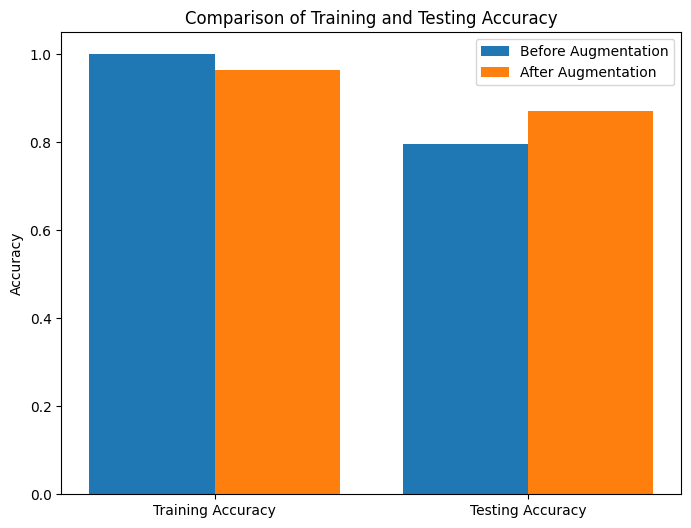

In [18]:
x = range(len(labels))
plt.figure(figsize=(8, 6))
plt.bar(x, before_augmentation, width=0.4, label='Before Augmentation', align='center')
plt.bar([i + 0.4 for i in x], after_augmentation, width=0.4, label='After Augmentation', align='center')
plt.xticks([i + 0.2 for i in x], labels)
plt.ylabel('Accuracy')
plt.title('Comparison of Training and Testing Accuracy')
plt.legend()
plt.show()